In [203]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [204]:
df = pd.read_csv('../../data/raw/test.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [205]:
usefullColumn = ['Id','LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'YearBuilt', 'OverallQual', 'OverallCond', 'ExterQual', 'KitchenQual', 'GarageQual', 'BsmtQual', 'Neighborhood', 'MSZoning', 'YearRemodAdd', 'GarageYrBlt', 'Fireplaces', 'FullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'BsmtFinSF1', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageArea']
#On a rajouté GarageCars , BsmtFinSF1, TotalBsmtSF, TotRmsAbvGrd, GarageArea
df = df[usefullColumn]
df

,Id,LotArea,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,YearBuilt,OverallQual,...,Fireplaces,FullBath,FullBath,BedroomAbvGr,KitchenAbvGr,GarageCars,BsmtFinSF1,TotalBsmtSF,TotRmsAbvGrd,GarageArea
0,1461,11622,896,882.0,896,0,730.0,140,1961,5,...,0,1,1,2,1,1.0,468.0,882.0,5,730.0
1,1462,14267,1329,1329.0,1329,0,312.0,393,1958,6,...,0,1,1,3,1,1.0,923.0,1329.0,6,312.0
2,1463,13830,1629,928.0,928,701,482.0,212,1997,5,...,1,2,2,3,1,2.0,791.0,928.0,6,482.0
3,1464,9978,1604,926.0,926,678,470.0,360,1998,6,...,1,2,2,3,1,2.0,602.0,926.0,7,470.0
4,1465,5005,1280,1280.0,1280,0,506.0,0,1992,8,...,0,2,2,2,1,2.0,263.0,1280.0,5,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1936,1092,546.0,546,546,0.0,0,1970,4,...,0,1,1,3,1,0.0,0.0,546.0,5,0.0
1455,2916,1894,1092,546.0,546,546,286.0,0,1970,4,...,0,1,1,3,1,1.0,252.0,546.0,6,286.0
1456,2917,20000,1224,1224.0,1224,0,576.0,474,1960,5,...,1,1,1,4,1,2.0,1224.0,1224.0,7,576.0
1457,2918,10441,970,912.0,970,0,0.0,80,1992,5,...,0,1,1,3,1,0.0,337.0,912.0,6,0.0


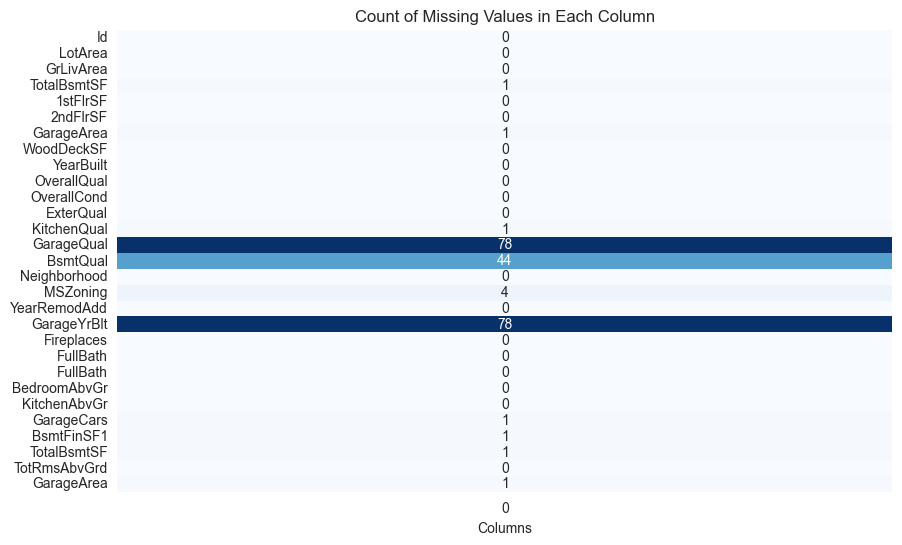

In [206]:
missing_values = df.isna().sum()
fig_missing_values = plt.figure(figsize=(10, 6))
sns.heatmap(missing_values.to_frame(), cmap='Blues', annot=True, fmt='d', cbar=False)
plt.title('Count of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('')
plt.show()

In [207]:
#df = df.dropna(subset=['GarageQual', 'BsmtQual', 'GarageYrBlt', 'KitchenQual', 'MSZoning'])
df

,Id,LotArea,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,YearBuilt,OverallQual,...,Fireplaces,FullBath,FullBath,BedroomAbvGr,KitchenAbvGr,GarageCars,BsmtFinSF1,TotalBsmtSF,TotRmsAbvGrd,GarageArea
0,1461,11622,896,882.0,896,0,730.0,140,1961,5,...,0,1,1,2,1,1.0,468.0,882.0,5,730.0
1,1462,14267,1329,1329.0,1329,0,312.0,393,1958,6,...,0,1,1,3,1,1.0,923.0,1329.0,6,312.0
2,1463,13830,1629,928.0,928,701,482.0,212,1997,5,...,1,2,2,3,1,2.0,791.0,928.0,6,482.0
3,1464,9978,1604,926.0,926,678,470.0,360,1998,6,...,1,2,2,3,1,2.0,602.0,926.0,7,470.0
4,1465,5005,1280,1280.0,1280,0,506.0,0,1992,8,...,0,2,2,2,1,2.0,263.0,1280.0,5,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1936,1092,546.0,546,546,0.0,0,1970,4,...,0,1,1,3,1,0.0,0.0,546.0,5,0.0
1455,2916,1894,1092,546.0,546,546,286.0,0,1970,4,...,0,1,1,3,1,1.0,252.0,546.0,6,286.0
1456,2917,20000,1224,1224.0,1224,0,576.0,474,1960,5,...,1,1,1,4,1,2.0,1224.0,1224.0,7,576.0
1457,2918,10441,970,912.0,970,0,0.0,80,1992,5,...,0,1,1,3,1,0.0,337.0,912.0,6,0.0


In [208]:
mapping = {
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

df.loc[:, 'ExterQual'] = df['ExterQual'].map(mapping)
df.loc[:, 'KitchenQual'] = df['KitchenQual'].map(mapping)
df.loc[:, 'GarageQual'] = df['GarageQual'].map(mapping)
df.loc[:, 'BsmtQual'] = df['BsmtQual'].map(mapping)
df

,Id,LotArea,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,YearBuilt,OverallQual,...,Fireplaces,FullBath,FullBath,BedroomAbvGr,KitchenAbvGr,GarageCars,BsmtFinSF1,TotalBsmtSF,TotRmsAbvGrd,GarageArea
0,1461,11622,896,882.0,896,0,730.0,140,1961,5,...,0,1,1,2,1,1.0,468.0,882.0,5,730.0
1,1462,14267,1329,1329.0,1329,0,312.0,393,1958,6,...,0,1,1,3,1,1.0,923.0,1329.0,6,312.0
2,1463,13830,1629,928.0,928,701,482.0,212,1997,5,...,1,2,2,3,1,2.0,791.0,928.0,6,482.0
3,1464,9978,1604,926.0,926,678,470.0,360,1998,6,...,1,2,2,3,1,2.0,602.0,926.0,7,470.0
4,1465,5005,1280,1280.0,1280,0,506.0,0,1992,8,...,0,2,2,2,1,2.0,263.0,1280.0,5,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1936,1092,546.0,546,546,0.0,0,1970,4,...,0,1,1,3,1,0.0,0.0,546.0,5,0.0
1455,2916,1894,1092,546.0,546,546,286.0,0,1970,4,...,0,1,1,3,1,1.0,252.0,546.0,6,286.0
1456,2917,20000,1224,1224.0,1224,0,576.0,474,1960,5,...,1,1,1,4,1,2.0,1224.0,1224.0,7,576.0
1457,2918,10441,970,912.0,970,0,0.0,80,1992,5,...,0,1,1,3,1,0.0,337.0,912.0,6,0.0


In [209]:
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Neighborhood', 'MSZoning'])
    ],
    remainder='passthrough'
)

df_one_hot = column_transformer.fit_transform(df)
df_one_hot = pd.DataFrame(df_one_hot, columns=column_transformer.get_feature_names_out())

In [210]:
df_one_hot

,cat__Neighborhood_Blmngtn,cat__Neighborhood_Blueste,cat__Neighborhood_BrDale,cat__Neighborhood_BrkSide,cat__Neighborhood_ClearCr,cat__Neighborhood_CollgCr,cat__Neighborhood_Crawfor,cat__Neighborhood_Edwards,cat__Neighborhood_Gilbert,cat__Neighborhood_IDOTRR,...,remainder__Fireplaces,remainder__FullBath,remainder__FullBath,remainder__BedroomAbvGr,remainder__KitchenAbvGr,remainder__GarageCars,remainder__BsmtFinSF1,remainder__TotalBsmtSF,remainder__TotRmsAbvGrd,remainder__GarageArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,2,1,1.0,468.0,882.0,5,730.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,3,1,1.0,923.0,1329.0,6,312.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,2,2,3,1,2.0,791.0,928.0,6,482.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,2,2,3,1,2.0,602.0,926.0,7,470.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,2,2,1,2.0,263.0,1280.0,5,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,3,1,0.0,0.0,546.0,5,0.0
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,3,1,1.0,252.0,546.0,6,286.0
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,4,1,2.0,1224.0,1224.0,7,576.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,3,1,0.0,337.0,912.0,6,0.0


In [211]:
df_one_hot.rename(columns={
    'remainder__Id': 'Id',
    'remainder__SalePrice': 'SalePrice',
    "remainder__LotArea": "LotArea",
    'remainder__GrLivArea': 'GrLivArea',
    "remainder__TotalBsmtSF": "TotalBsmtSF",
    "remainder__1stFlrSF": "1stFlrSF",
    "remainder__2ndFlrSF": "2ndFlrSF",
    "remainder__GarageArea": "GarageArea",
    "remainder__WoodDeckSF": "WoodDeckSF",
    "remainder__YearBuilt": "YearBuilt",
    "remainder__OverallQual": "OverallQual",
    "remainder__OverallCond": "OverallCond",
    "remainder__ExterQual": "ExterQual",
    "remainder__KitchenQual": "KitchenQual",
}, inplace=True)
df_one_hot

,cat__Neighborhood_Blmngtn,cat__Neighborhood_Blueste,cat__Neighborhood_BrDale,cat__Neighborhood_BrkSide,cat__Neighborhood_ClearCr,cat__Neighborhood_CollgCr,cat__Neighborhood_Crawfor,cat__Neighborhood_Edwards,cat__Neighborhood_Gilbert,cat__Neighborhood_IDOTRR,...,remainder__Fireplaces,remainder__FullBath,remainder__FullBath,remainder__BedroomAbvGr,remainder__KitchenAbvGr,remainder__GarageCars,remainder__BsmtFinSF1,TotalBsmtSF,remainder__TotRmsAbvGrd,GarageArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,2,1,1.0,468.0,882.0,5,730.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,3,1,1.0,923.0,1329.0,6,312.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,2,2,3,1,2.0,791.0,928.0,6,482.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,2,2,3,1,2.0,602.0,926.0,7,470.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,2,2,1,2.0,263.0,1280.0,5,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,3,1,0.0,0.0,546.0,5,0.0
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,3,1,1.0,252.0,546.0,6,286.0
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,4,1,2.0,1224.0,1224.0,7,576.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,3,1,0.0,337.0,912.0,6,0.0


In [212]:
df_one_hot.to_csv('../../data/processed/test.csv', index=False)